# Double Q-Learner

Double Q-Learning was created by Hado van Hasselt in 2010. The idea is that because a normal q-learner uses *max* that it overestimates the action values. To help solve this Hasselt introduces a second Q table that we will use to figure out the max value action estimate.

Here is the abstract from the paper:  
In some stochastic environments the well-known reinforcement learning algorithm
Q-learning performs very poorly. This poor performance is caused by large
overestimations of action values. These overestimations result from a positive
bias that is introduced because Q-learning uses the maximum action value as an
approximation for the maximum expected action value. We introduce an alternative
way to approximate the maximum expected value for any set of random
variables. The obtained double estimator method is shown to sometimes underestimate
rather than overestimate the maximum expected value. We apply the
double estimator to Q-learning to construct Double Q-learning, a new off-policy
reinforcement learning algorithm. We show the new algorithm converges to the
optimal policy and that it performs well in some settings in which Q-learning performs
poorly due to its overestimation

**Equations**   
Remember, this is the Q-learning update formula  
$$Q'(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha * \big( r_t + \gamma * max_a Q(s_{t+1},a) - Q(s_t,a_t) \big) $$  

When using a Double Q-learner you will have 2 update equations that you randomly select which one you update. 
Choose UPDATE(A) or UPDATE(B) randomly  
UPDATE(A)
$$a^* = arg \, max_a Q^A(s',a)$$
$$Q^A(s,a) \leftarrow Q^A(s,a) + \alpha(s,a) * \big( r + \gamma * Q^B(s',a^*) - Q^A(s,a) \big) $$
UPDATE(B)
$$a^* = arg \, max_a Q^B(s',a)$$
$$Q^B(s,a) \leftarrow Q^B(s,a) + \alpha(s,a) * \big( r + \gamma * Q^A(s',a^*) - Q^B(s,a) \big) $$  

Now, to put this in simplier terms, if you are doing UPDATE(A) you will do the equation like normal BUT when you find the future rewards ($Q^B(s',a^*)$) you are finding the **MAX** value from the $Q^A$ table and taking that index and getting the actual value from $Q^B$.  

In an attempt to cement this in your brains here is an example:  
$Q^A$ has this entry in state X: [ 0.1, 0.2, 0.12, 0.005]  
$Q^B$ has this entry in state X: [ 0.9, 0.5, 0.30, 0.020]  

What is the expected future value if you are doing UPDATE(A)?

In [3]:
from doubleq import DoubleQQuestion1
DoubleQQuestion1(0.0)

Incorrect.
  First, you need to find the index of MAX(Q^A)
  Then, you find the expected value at that index in Q^B


I am going to do one more question before we get into the implementation of a full Double Q-Leaner.  

Code up both UpdateA and UpdateB and then run the test below.

In [4]:
import numpy as np

In [11]:
def UpdateA(QA, QB, state, action, nstate, alpha=1, reward=1, gamma=1, done=False):
    #Find a* (Index of the max value in s') in QA
    a_star_idx = 0 #TODO
    #Find QB[s',a*]
    future_value = 0 #TODO
    QA[state][action] += alpha * (reward + gamma * future_value * (not done) - QA[state][action])

In [12]:
def UpdateB(QA, QB, state, action, nstate, alpha=1, reward=1, gamma=1, done=False):
    #Find a* (Index of the max value in s') in QA
    a_star_idx = 0 #TODO
    #Find QA[s',a*]
    future_value = 0 #TODO
    QB[state][action] += alpha * (reward + gamma * future_value * (not done) - QB[state][action])

In [13]:
nS = 10 #10 States
nA = 4 #4 Actions
QA = np.zeros((nS,nA), dtype=np.float)
QB = np.zeros((nS,nA), dtype=np.float)

#Set the maximum expected value for each of the 4 actions for state 1
QA[1] = (1,2,3,4)
QB[1] = (8,7,6,5)

QA[2] = (5,6,2,1)
QB[2] = (7,5,6,4)

#Starting at state 1, take action 3, and end up in state 2
UpdateA(QA,QB, 1, 3, 2)
if QA[1,3] == 6.0:
    print('Success')
else:
    print('Fail. Try again.')
#Repeat with QB being randomly selected
UpdateB(QA,QB, 1, 3, 2)
if QB[1,3] == 6.0:
    print('Success')
else:
    print('Fail. Try again.')

Fail. Try again.
Fail. Try again.


If you were having troubles here is how I would explain what was going on. I am going to use UpdateA as an example as it should be easy enough for you to switch $Q^A$ and $Q^B$.  

To find $$a^* = arg \, max_a Q^A(s',a)$$ you need to find the index of the max value in the next state (nstate in code) of  $Q^A$. Numpy has np.argmax for just this reason.  
CODE: a_star_idx = np.argmax(QA[nstate])

To find $$Q^B(s',a^*)$$ you would take the index from the previous answer and put it against the next state (nstate) of $Q^B$.  
CODE: future_value = QB[nstate,a_star_idx]

## CartPole Example  
Below I am going to recreate the same CartPole example as the Q-Learner but with the addition of the second Q table. Try and run these and compare to what you were able to accomplish before and see if you are seeing smother results or faster results. If you were to really do this comparison you should run ~10x of each algorithm to smooth out the outliers.

In [14]:
#Imports
import gym
import numpy as np
import matplotlib.pyplot as plt

from gym import wrappers
envCartPole = gym.make('CartPole-v1')

[2018-11-04 13:16:22,936] Making new env: CartPole-v1


In [15]:
#Helper methods
def UpdateA(QA, QB, state, action, nstate, alpha=1, reward=1, gamma=1, done=False):
    #Find a* (Index of the max value in s') in QA
    a_star_idx = np.argmax(QA[nstate])
    #Find QB[s',a*]
    future_value = QB[nstate,a_star_idx]
    QA[state][action] += alpha * (reward + gamma * future_value * (not done) - QA[state][action])

def UpdateB(QA, QB, state, action, nstate, alpha=1, reward=1, gamma=1, done=False):
    #Find a* (Index of the max value in s') in QA
    a_star_idx = np.argmax(QB[nstate])
    #Find QA[s',a*]
    future_value = QA[nstate,a_star_idx]
    QB[state][action] += alpha * (reward + gamma * future_value * (not done) - QB[state][action])

def observation_to_state(observation, bucket):
    disc_state = []
    for i in range(len(observation)): #Step through each of the 4 states
        disc_state.append(int(np.digitize(observation[i], bins=bucket[i])))
    state = int(''.join(map(lambda feature: str(int(feature)), disc_state)))
    return state

def learning_schedule(e, max_episode):
    return 0.8

def action_selection(state, Q, e, max_episodes):
    #0-1k: 100% explore
    #1k-2k: 80%
    #2k-3k: 75%
    #3k-4k: 50%
    #4k-5k: 0%
    if e < 1000:
        epsilon = 0.99
    elif e < 2000:
        epsilon = 0.50
    elif e < 3000:
        epsilon = 0.25
    elif e < 4000:
        epsilon = 0.05
    else:
        epsilon = 0
    action = np.random.randint(Q.shape[1]) if np.random.random() < epsilon else np.argmax(Q[state])
    return action

In [16]:
#Build Buckets
def build_buckets():
    observations = []
    for episode in range(1000): #1k episodes should give us enough data
        observation = envCartPole.reset()
        for step in range(100): #Do only 100 steps per episode unless we finish
            observations.append(observation)
            action = envCartPole.action_space.sample()
            if episode < 25: #First 20 episodes only go left
                action = 0
            elif episode < 50: #Next 20 episodes only go right
                action = 1
            observation, reward, done, info = envCartPole.step(action)
            if done: #Fell or hit the goal
                break
    envCartPole.close()
    x_vals = np.array(observations)[:,0]
    xd_vals = np.array(observations)[:,1]
    a_vals = np.array(observations)[:,2]
    ad_vals = np.array(observations)[:,3]
    y = np.zeros_like(x_vals)

    x_thres = ((envCartPole.env.observation_space.low/2)[0],
           (envCartPole.env.observation_space.high/2)[0])
    a_thres = ((envCartPole.env.observation_space.low/2)[2],
           (envCartPole.env.observation_space.high/2)[2])

    x1 = np.linspace(np.min(x_vals), np.max(x_vals), 4, endpoint=False)[1:]
    xd1 = np.sort(np.append(np.linspace(-1.5,1.5,4,endpoint=True),0))
    a1 = np.sort(np.linspace(a_thres[0], a_thres[1],10, endpoint=False)[1:])
    all_vals = np.sort(np.append(
        (np.logspace(-7, 4, 6, endpoint=False, base=2)[1:],
         -np.logspace(-7, 4, 6, endpoint=False, base=2)[1:]), 0))
    idxs = np.where(np.abs(all_vals) < 2)
    ad1 = all_vals[idxs]

    return (x1, xd1, a1, ad1)

In [17]:
#Double Q-Learning Method
def double_q_learning(env, buckets):
    gamma = 0.99
    rewards = []    

    nS = 10 * 10 * 10 * 10 #Ensure this is plenty big. If I was concerned about space I can use the bucket sizes to calculate this.
    nA = envCartPole.action_space.n #env.env.env.nA
    Q = np.random.random((nS,nA)) #Initialize the Q table to all random numbers
    episodes = 5000
    for e in range(episodes):
        observation = env.reset()
        state = observation_to_state(observation, buckets)
        total_reward = 0
        while True:
            action = action_selection(state, Q, e, episodes) #Grab the action
            observation, reward, done, infor = env.step(action)
            nstate = observation_to_state(observation,buckets)
            total_reward += reward

            alpha = learning_schedule(e,episodes)

            #Q Function Update
            if np.random.random() < 0.5:
                UpdateA(Q,Q,state, action, nstate, alpha, reward, gamma, done)
            else:
                UpdateB(Q,Q,state, action, nstate, alpha, reward, gamma, done)

            state = nstate
            
            if done:
                rewards.append(total_reward)
                break
    return Q, rewards

[[  4.59210117e-01   1.08351959e+00]
 [  5.66892590e+01   9.31760087e-01]
 [  5.66942236e+01   1.05153313e+01]
 ..., 
 [  3.63253399e-02   5.70269287e-01]
 [  9.21269929e-01   4.17766940e-01]
 [  7.87097497e-02   4.93495695e-01]]


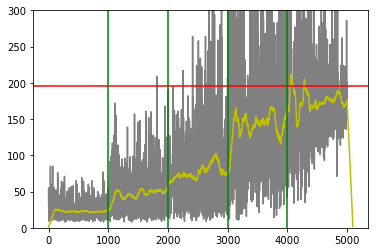

In [18]:
buckets = build_buckets()
Q, rewards = double_q_learning(envCartPole, buckets) #Return the optimal policy and the Q table results



#print(pi,Q)
print(Q)
#print (pi,V)

rolling_average = np.convolve(rewards, np.ones(100)/100)

plt.plot(rewards, color='grey')
plt.plot(rolling_average, color='y')
plt.axhline(y=195, color='r', linestyle='-') #Solved Line
#NOTE: These are the epsilon changes in my original code
plt.axvline(x=1000, color='g', linestyle='-')
plt.axvline(x=2000, color='g', linestyle='-')
plt.axvline(x=3000, color='g', linestyle='-')
plt.axvline(x=4000, color='g', linestyle='-')
plt.ylim( (0,300) )
plt.show()


envCartPole.close()

**Conclusion**  
I hope that this gives you a good idea about a Double Q-Learner. If you read the PDF I referenced below you can see a more indepth analysis as well as his results on roulette and a simple grid world.

*References*  
Hasselt, H. V. (2010). Double Q-learning. Advances in Neural Information Processing Systems 23,2613-2621. Retrieved from http://papers.nips.cc/paper/3964-double-q-learning.pdf